<a href="https://colab.research.google.com/github/bantee-sharma/bert-spam-classifier/blob/main/Spam_Classifier_Using_bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers

In [10]:
# Import libraries
import os,re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdallahwagih/spam-emails")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/spam-emails


In [12]:
# Dataset loading
dataset = path

file_name = os.listdir(dataset)
print(file_name)

data = os.path.join(dataset,"spam.csv")
df = pd.read_csv(data)

df.head()

['spam.csv']


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [17]:
df["Category"].value_counts()

,count
Category,
ham,4825
spam,747


In [18]:
#Checking for dulicate values
df.duplicated().sum()

np.int64(415)

In [19]:
#Drop duplicate values
df.drop_duplicates(inplace=True)

In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
# Convert the "Category" column to numerical labels
df["type"] = df["Category"].map({"ham":0,"spam":1})

In [22]:
df["type"].value_counts()

,count
type,
0,4516
1,641


In [23]:
# Text cleaning
def clean_sent(sent):
    text = sent.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text


In [25]:
# Applying clean func
df["message"] = df["Message"].apply(clean_sent)

In [26]:
df.head()

,Category,Message,type,message
0,ham,"Go until jurong point, crazy.. Available only ...",0,"go until jurong point, crazy.. available only ..."
1,ham,Ok lar... Joking wif u oni...,0,ok lar... joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry in a wkly comp to win fa cup final ...
3,ham,U dun say so early hor... U c already then say...,0,u dun say so early hor... u c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,"nah i don't think he goes to usf, he lives aro..."


In [27]:
# Drop unnecessary columns
df.drop(["Category","Message"],inplace=True,axis=1)

In [28]:
df.head()

,type,message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in a wkly comp to win fa cup final ...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [29]:
# Split data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(df["message"],df["type"],test_size=0.20,random_state=7)

In [30]:
xtrain.shape,ytrain.shape

((4125,), (4125,))

In [32]:
# Convert to list
xtrain_list = xtrain.tolist()
xtest_list = xtest.tolist()

In [ ]:
from transformers import AutoTokenizer

In [43]:
# Load the pre-trained BERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [44]:
tokenizer(["hii my name is ben.","And i am from usa texas"],padding=True,truncation=True,max_length=150,return_tensors="tf")

{'input_ids': <tf.Tensor: shape=(2, 9), dtype=int32, numpy=
array([[ 101, 7632, 2072, 2026, 2171, 2003, 3841, 1012,  102],
       [ 101, 1998, 1045, 2572, 2013, 3915, 3146,  102,    0]],
      dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(2, 9), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(2, 9), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 0]], dtype=int32)>}

In [45]:
# Tokenize the training and testing text data using the BERT tokenizer
xtrain_tokenize = tokenizer(xtrain_list,padding=True,truncation=True,max_length=150,return_tensors="tf")
xtest_tokenize = tokenizer(xtest_list,padding=True,truncation=True,max_length=150,return_tensors="tf")

In [46]:
xtrain_tokenize

{'input_ids': <tf.Tensor: shape=(4125, 150), dtype=int32, numpy=
array([[  101, 28936,  2694, ...,     0,     0,     0],
       [  101,  2748,  1012, ...,     0,     0,     0],
       [  101,  1045,  2079, ...,     0,     0,     0],
       ...,
       [  101,  1045,  2113, ...,     0,     0,     0],
       [  101,  2057,  2031, ...,     0,     0,     0],
       [  101, 13661,   999, ...,     0,     0,     0]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(4125, 150), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(4125, 150), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=in

In [47]:
# Convert to tensors
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(xtrain_tokenize),
    tf.convert_to_tensor(ytrain,dtype = tf.int32)
)).batch(16)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(xtest_tokenize),
    tf.convert_to_tensor(ytest,dtype = tf.int32)
)).batch(16)

In [48]:
from transformers import TFBertForSequenceClassification

In [49]:
# Load the pre-trained BERT model for sequence classification (Binary Classification)
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased",num_labels=1)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [50]:
#  Define the optimizer and loss for training
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [51]:
# Model Compiling
model.compile(optimizer=optimizer,loss=loss,metrics=["accuracy"])

In [52]:
# trian model
history = model.fit(train_dataset,epochs=5,validation_data=test_dataset)

Epoch 1/5
258/258 [==============================] - 179s 519ms/step - loss: 0.1589 - accuracy: 0.9535 - val_loss: 0.0495 - val_accuracy: 0.9845
Epoch 2/5
258/258 [==============================] - 133s 514ms/step - loss: 0.0315 - accuracy: 0.9918 - val_loss: 0.0414 - val_accuracy: 0.9913
Epoch 3/5
258/258 [==============================] - 133s 515ms/step - loss: 0.0156 - accuracy: 0.9961 - val_loss: 0.0365 - val_accuracy: 0.9913
Epoch 4/5
258/258 [==============================] - 133s 515ms/step - loss: 0.0058 - accuracy: 0.9978 - val_loss: 0.0965 - val_accuracy: 0.9777
Epoch 5/5
258/258 [==============================] - 133s 514ms/step - loss: 0.0045 - accuracy: 0.9985 - val_loss: 0.0523 - val_accuracy: 0.9903


In [ ]:
#  Evaluate the model's performance on the test dataset
model.evaluate(test_dataset)

65/65 [==============================] - 12s 189ms/step - loss: 0.1243 - accuracy: 0.9680


[0.12434651702642441, 0.9680232405662537]

In [62]:
# Make predictions on the test dataset
pred = model.predict(test_dataset)

# Extract raw logits from the model output
logits = pred["logits"]

# Convert logits to probabilities using the sigmoid function
prob = tf.sigmoid(logits)

65/65 [==============================] - 11s 167ms/step


In [63]:
prob

<tf.Tensor: shape=(1032, 1), dtype=float32, numpy=
array([[9.9925250e-01],
       [5.3140533e-04],
       [5.8004999e-04],
       ...,
       [5.7591312e-04],
       [5.4653327e-04],
       [5.3133897e-04]], dtype=float32)>

In [64]:
# Convert probabilities into binary predictions (0 or 1)
pred = (prob > 0.5).numpy().astype(int)

In [65]:
pred

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

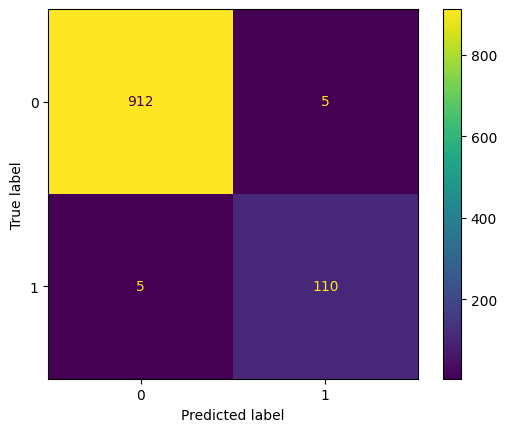

In [68]:
#Compute the confusion matrix to evaluate classification performance
cm = confusion_matrix(ytest, pred)

# 📌 Display the confusion matrix visually
ConfusionMatrixDisplay(cm).plot()
# This helps in understanding how well the model distinguishes between classes

In [69]:
def test_model(sent):
  input = tokenizer(sent,padding=True,max_length=150,truncation=True,return_tensors="tf")
  pred = model(input)
  logits = pred.logits
  prob = tf.sigmoid(logits)
  labels = (prob > 0.5).numpy().astype(int)
  return "🔴 Spam" if labels == 1 else "🟢 Not Spam"


In [70]:
sent = "You won a free prize! Click the link to claim."
print(test_model(sent))  # Output: [[1]]  (Spam)


🔴 Spam


In [71]:
test_model('''We are pleased to inform you that you have won $1,000,000 USD in our 2025 International Lottery Draw.
To claim your prize, please provide your:''')

'🔴 Spam'

In [74]:
test_model('''
Subject: Project Meeting Rescheduled
Hi Team,
Due to scheduling conflicts, our project meeting has been rescheduled to Wednesday at 3 PM.
Let me know if this works for everyone.
''')

'🟢 Not Spam'